<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/02_neural_network_classification_with_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [1]:
import tensorflow as tf

In [2]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [3]:
# 3. Check the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

# 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [4]:
# Create date to view and fit
from sklearn.datasets import make_moons

# Make 1000 samples
n_samples = 1000

# Create moon
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [5]:
X[:10], y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [6]:
# Visualize our data
import pandas as pd
moon = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moon

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


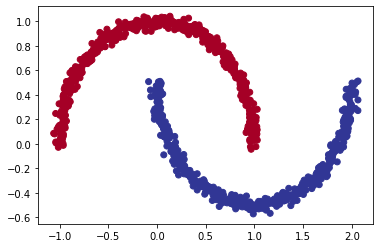

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
# Split into train data and test data
train_data, train_labels = X[:800], y[:800]
test_data, test_labels = X[800:], y[800:]

In [9]:
train_data.shape, train_labels.shape

((800, 2), (800,))

In [10]:
# Let try our data with model_1
history = model_1.fit(train_data, train_labels, epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 3ms/step - loss: 0.6907 - accuracy: 0.5325
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6850
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.7287
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.7788
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.8175
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.8263
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8850
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8938
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9087
Epoch 11/20
25/25 [

In [11]:
# Evaluate our model
model_1.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9100


[0.19419912993907928, 0.9100000262260437]

Wow, 91% at the first time, quite good

Text(0.5, 1.0, 'Model_1 loss curves')

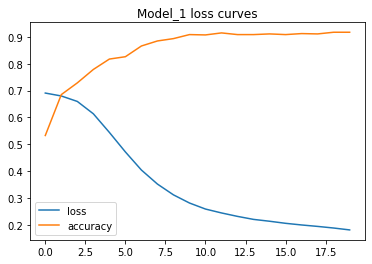

In [12]:
# Plot the training curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 loss curves")

In [16]:
# Fiding the ideal learning rate

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

# 4. Fit the model (50 epochs)
history_2 = model_2.fit(train_data, train_labels, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.4963
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4650
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5400
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5863
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6137
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6438
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.7550
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.8650
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.8612
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.8687
Epoch 11/50
25/25 [

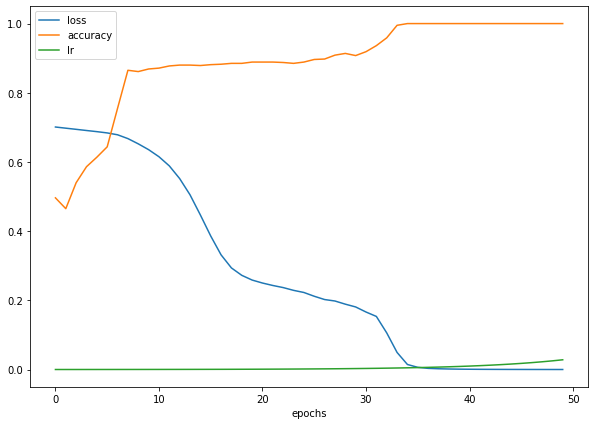

In [17]:
# Check out the hisroty
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs")


Text(0.5, 1.0, 'Learning rate vs loss')

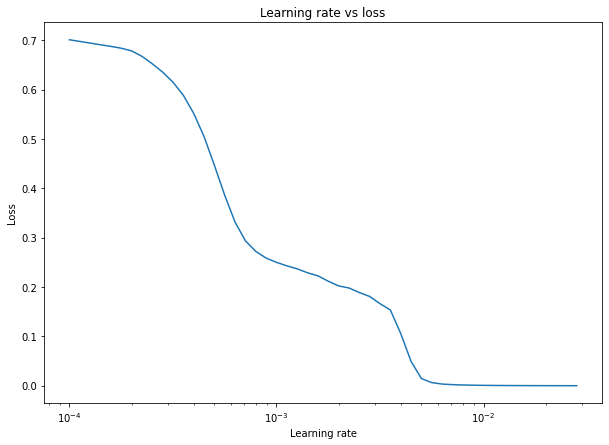

In [18]:
# Plot the learning rate vs Loss
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [19]:
# Evaluate the model_2
model_2.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 1.6052e-04 - accuracy: 1.0000


[0.00016052070714067668, 1.0]

In [23]:
# Let's create the model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(train_data, train_labels, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.5625
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7613
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.8462
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.8675
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.8725
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.8662
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.8725
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8775
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8863
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8950
Epoch 11/50
25/25 [

In [25]:
# Evaluate our model
model_3.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.8900


[0.21548298001289368, 0.8899999856948853]

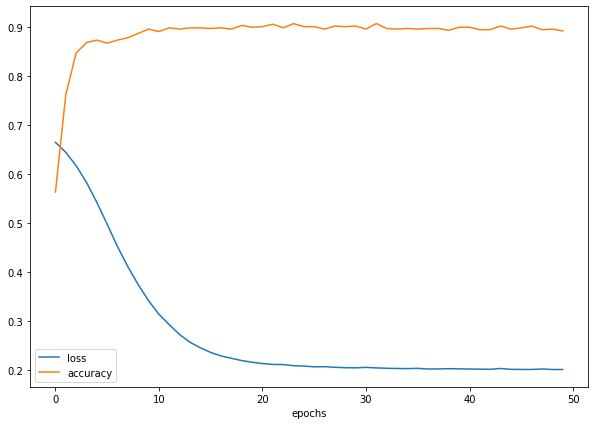

In [24]:
# Plot the accuracy and loss curves
pd.DataFrame(history_3.history).plot(figsize=(10, 7), xlabel="epochs")

In [38]:
# Write a plot_decision boundary function:

import numpy as np
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predict one these)
  X_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
  # print(X_in[:10])
  # Make prediction
  y_pred = model.predict(X_in)
  
  # Check for the multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape out prediction to get them already
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

[[-1.16175082 -0.6716972 ]
 [-1.12815094 -0.6716972 ]
 [-1.09455106 -0.6716972 ]
 [-1.06095118 -0.6716972 ]
 [-1.0273513  -0.6716972 ]
 [-0.99375142 -0.6716972 ]
 [-0.96015153 -0.6716972 ]
 [-0.92655165 -0.6716972 ]
 [-0.89295177 -0.6716972 ]
 [-0.85935189 -0.6716972 ]]
doing binary classification


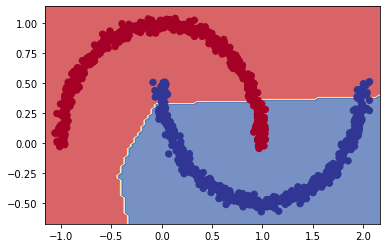

In [35]:
plot_decision_boundary(model_3, X, y)

[[-1.16175082 -0.6716972 ]
 [-1.12815094 -0.6716972 ]
 [-1.09455106 -0.6716972 ]
 [-1.06095118 -0.6716972 ]
 [-1.0273513  -0.6716972 ]
 [-0.99375142 -0.6716972 ]
 [-0.96015153 -0.6716972 ]
 [-0.92655165 -0.6716972 ]
 [-0.89295177 -0.6716972 ]
 [-0.85935189 -0.6716972 ]]
doing binary classification


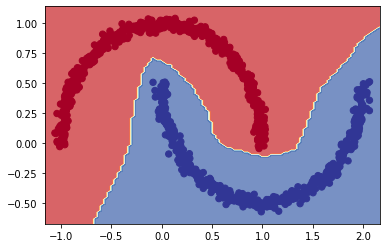

In [36]:
plot_decision_boundary(model_2, X, y)

doing binary classification
doing binary classification


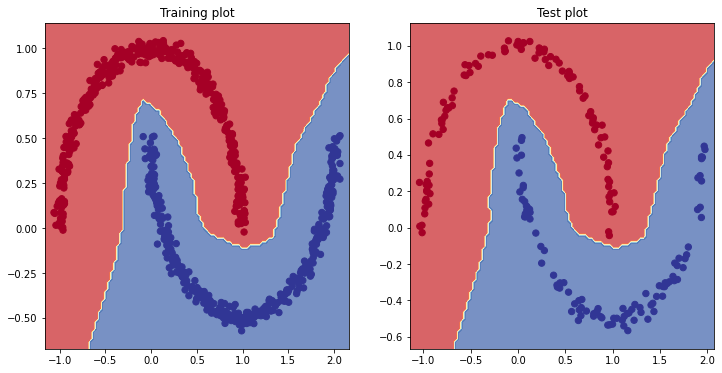

In [39]:
# Plot the decision boudaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training plot")
plot_decision_boundary(model_2, X=train_data, y=train_labels)
plt.subplot(1, 2, 2)
plt.title("Test plot")
plot_decision_boundary(model_2, X=test_data, y=test_labels)

# 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [46]:
# At first I will normalized the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [50]:
# Let's build the model but this time I will increase the number of Dense layers by one

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2228 - accuracy: 0.5265
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7745 - accuracy: 0.7208
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7203 - accuracy: 0.7411
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.7495
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6793 - accuracy: 0.7548
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6692 - accuracy: 0.7584
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6609 - accuracy: 0.7611
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6542 - accuracy: 0.7631
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6474 - accuracy: 0.7653
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.640

In [55]:
# Let's valuate our model
model_4.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 0.6233 - accuracy: 0.7851


[0.6232854127883911, 0.785099983215332]

In [56]:
# How about train model with validation data ?
model_4.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=40,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5660 - accuracy: 0.8038 - val_loss: 0.6158 - val_accuracy: 0.7855
Epoch 2/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5653 - accuracy: 0.8050 - val_loss: 0.6382 - val_accuracy: 0.7803
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5637 - accuracy: 0.8046 - val_loss: 0.6165 - val_accuracy: 0.7884
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5642 - accuracy: 0.8052 - val_loss: 0.6184 - val_accuracy: 0.7876
Epoch 5/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5635 - accuracy: 0.8040 - val_loss: 0.6226 - val_accuracy: 0.7853
Epoch 6/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5632 - accuracy: 0.8055 - val_loss: 0.6195 - val_accuracy: 0.7873
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5623 - accuracy: 0.8055 - val_loss: 0.6263 - val_accuracy:

In [57]:
# How we can improve our model ?

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1198 - accuracy: 0.6197 - val_loss: 0.7557 - val_accuracy: 0.7340
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6627 - accuracy: 0.7681 - val_loss: 0.6296 - val_accuracy: 0.7816
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5753 - accuracy: 0.8015 - val_loss: 0.5781 - val_accuracy: 0.7969
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5436 - accuracy: 0.8106 - val_loss: 0.5512 - val_accuracy: 0.8068
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5214 - accuracy: 0.8148 - val_loss: 0.5690 - val_accuracy: 0.7911
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5044 - accuracy: 0.8206 - val_loss: 0.5412 - val_accuracy: 0.8109
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4941 - accuracy: 0.8246 - val_loss: 0.5661 - val_accuracy:

In [58]:
# Evaluate our model 
model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.8241


[0.5049957633018494, 0.8241000175476074]

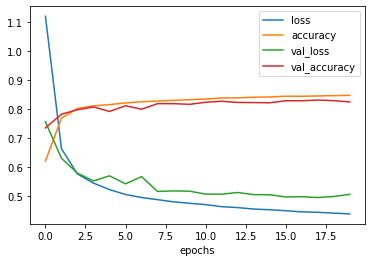

In [59]:
# Plot data loss curves
pd.DataFrame(history_5.history).plot(xlabel="epochs")

In [60]:
# How about we add one more layer ?

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(train_data_norm,
                        train_labels,
                        epochs=25,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9826 - accuracy: 0.6284 - val_loss: 0.7114 - val_accuracy: 0.7360
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6306 - accuracy: 0.7697 - val_loss: 0.6048 - val_accuracy: 0.7950
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5508 - accuracy: 0.8092 - val_loss: 0.5793 - val_accuracy: 0.7941
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5267 - accuracy: 0.8173 - val_loss: 0.5479 - val_accuracy: 0.8106
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5148 - accuracy: 0.8204 - val_loss: 0.5434 - val_accuracy: 0.8131
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8233 - val_loss: 0.5699 - val_accuracy: 0.7979
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4980 - accuracy: 0.8239 - val_loss: 0.5299 - val_accuracy:

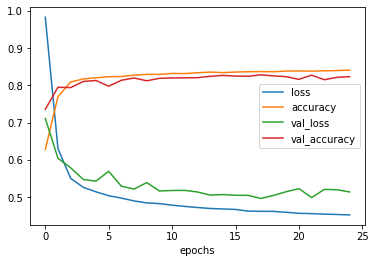

In [62]:
pd.DataFrame(history_6.history).plot(xlabel="epochs")

In [69]:
# Let find the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create the learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

# 4. Fit the model
history_7 = model_7.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8594 - accuracy: 0.2888 - val_loss: 1.4279 - val_accuracy: 0.4226
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1600 - accuracy: 0.5822 - val_loss: 0.9851 - val_accuracy: 0.6538
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8326 - accuracy: 0.6985 - val_loss: 0.7846 - val_accuracy: 0.7210
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7216 - accuracy: 0.7460 - val_loss: 0.7091 - val_accuracy: 0.7554
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6592 - accuracy: 0.7734 - val_loss: 0.6563 - val_accuracy: 0.7734
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6112 - accuracy: 0.7916 - val_loss: 0.6153 - val_accuracy: 0.7884
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5752 - accuracy: 0.8058 - val_loss: 0.5916 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

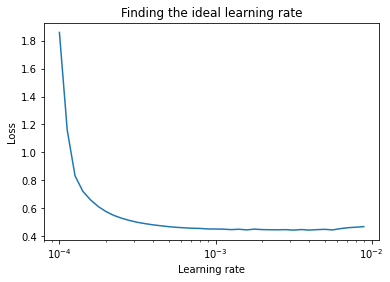

In [72]:
# Plot the learning rate decay curve

import matplotlib.pyplot as plt

lrs = 1e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [74]:
# How about we add one more layer ?

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(train_data_norm,
                        train_labels,
                        epochs=25,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5238 - accuracy: 0.4577 - val_loss: 0.9320 - val_accuracy: 0.6535
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7700 - accuracy: 0.7403 - val_loss: 0.7166 - val_accuracy: 0.7539
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6502 - accuracy: 0.7789 - val_loss: 0.6448 - val_accuracy: 0.7776
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5989 - accuracy: 0.7941 - val_loss: 0.6051 - val_accuracy: 0.7885
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5667 - accuracy: 0.8060 - val_loss: 0.5781 - val_accuracy: 0.7964
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5437 - accuracy: 0.8132 - val_loss: 0.5623 - val_accuracy: 0.8049
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5271 - accuracy: 0.8197 - val_loss: 0.5527 - val_accuracy: